In [ ]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

I am currently interested in the stock market between banks, specifically JPM, among its competitions: BoA, Citi, Wells Fargo, BNY

In [ ]:
# JP-Morgan
jpm = yf.Ticker('jpm')

In [ ]:
# Visualize what information about jpm we have
stockinfo = jpm.info

In [ ]:
# View all of the information
for key, value in stockinfo.items():
  print(key, ":", value)

address1 : 383 Madison Avenue
city : New York
state : NY
zip : 10179
country : United States
phone : 212 270 6000
website : https://www.jpmorganchase.com
industry : Banks - Diversified
industryKey : banks-diversified
industryDisp : Banks - Diversified
sector : Financial Services
sectorKey : financial-services
sectorDisp : Financial Services
longBusinessSummary : JPMorgan Chase & Co. operates as a financial services company worldwide. It operates through four segments: Consumer & Community Banking (CCB), Corporate & Investment Bank (CIB), Commercial Banking (CB), and Asset & Wealth Management (AWM). The CCB segment offers deposit, investment and lending products, cash management, and payments and services; mortgage origination and servicing activities; residential mortgages and home equity loans; and credit cards, auto loans, leases, and travel services to consumers and small businesses through bank branches, ATMs, and digital and telephone banking. The CIB segment provides investment b

In [ ]:
# Number of shareOutstanding
print(jpm.info['sharesOutstanding'])

2871670016


In [ ]:
#Recommendations for this stock from analysts
print(jpm.recommendations)

  period  strongBuy  buy  hold  sell  strongSell
0     0m          4    9    13     1           1
1    -1m          7   12     8     0           0
2    -2m          7   13     7     0           0
3    -3m          5   13     8     3           0


In [ ]:
# Stock split history
print(jpm.splits)

Date
1982-04-16 00:00:00-05:00    1.5
1984-04-16 00:00:00-05:00    1.5
1998-06-15 00:00:00-04:00    2.0
2000-06-12 00:00:00-04:00    1.5
Name: Stock Splits, dtype: float64


**Dividends and Plot of Trends**

In [ ]:
# Dividends
print(jpm.dividends)

Date
1984-03-09 00:00:00-05:00    0.196667
1984-06-11 00:00:00-04:00    0.196667
1984-09-10 00:00:00-04:00    0.196667
1984-12-10 00:00:00-05:00    0.196667
1985-03-11 00:00:00-05:00    0.206667
                               ...   
2023-04-05 00:00:00-04:00    1.000000
2023-07-05 00:00:00-04:00    1.000000
2023-10-05 00:00:00-04:00    1.050000
2024-01-04 00:00:00-05:00    1.050000
2024-04-04 00:00:00-04:00    1.150000
Name: Dividends, Length: 162, dtype: float64


In [ ]:
df = jpm.dividends
data = df.resample('Y').sum()
data = data.reset_index() #Convert index into a column
data['Year'] = data ['Date'].dt.year

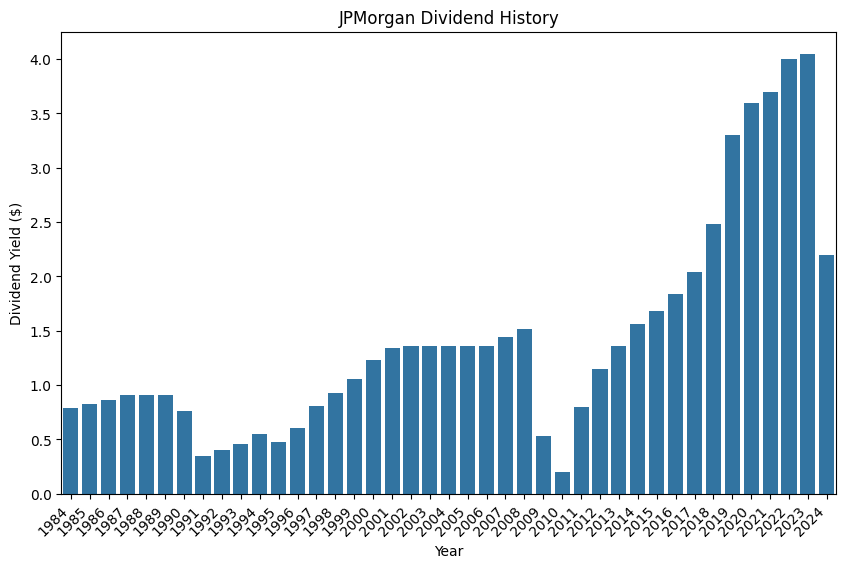

In [ ]:
#Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y = 'Dividends', data = data)
plt.ylabel('Dividend Yield ($)')
plt.xlabel('Year')
plt.title('JPMorgan Dividend History')
plt.xticks(rotation = 45, ha = 'right')
plt.show()



*   From 1984 to 2000, JPM's dividend yield remainded pretty stable
*   In early 2000s, there was a noticeable drop in dividend yield. The decline might be due to the aftermath of the dot-com bubble burst and financial instability that followed
* Dividend yield reached its lowest point around 2009-2010, which likely due to the financial crisis in 2007
* From 2011 onwards, there is a clear upward trend, indicating strong financial performance and confidence in returning value to shareholders
* Dividend yield reached its peak around 2023, indicating highest dividend payouts in the given period. However, it follows by a slight decline in 2024



In [ ]:
# Major hold of the stocks
print(jpm.major_holders)

Breakdown                          Value
insidersPercentHeld              0.00453
institutionsPercentHeld          0.73565
institutionsFloatPercentHeld     0.73900
institutionsCount             5004.00000


In [ ]:
# See what insitutions the holders are from
print(jpm.institutional_holders)

  Date Reported                            Holder  pctHeld     Shares  \
0    2023-06-30                Vanguard Group Inc   0.0941  273451539   
1    2023-06-30                    Blackrock Inc.   0.0662  192272356   
2    2023-06-30          State Street Corporation   0.0434  126243947   
3    2023-06-30                    Morgan Stanley   0.0216   62739902   
4    2023-06-30       Bank of America Corporation   0.0192   55851508   
5    2023-06-30     Geode Capital Management, LLC   0.0184   53367497   
6    2023-06-30                          FMR, LLC   0.0168   48811257   
7    2023-06-30   Capital International Investors   0.0141   41082210   
8    2023-06-30           Capital World Investors   0.0132   38362149   
9    2023-06-30  Wellington Management Group, LLP   0.0130   37818621   

         Value  
0  39770791832  
1  27964091456  
2  18360919651  
3   9124891346  
4   8123043323  
5   7761768763  
6   7099109218  
7   5974996622  
8   5579390950  
9   5500340238  


In [ ]:
print(jpm.cashflow) #Values such as cashflow, financials, balance_sheet are empty

                                                    2023-12-31  \
Free Cash Flow                                   12974000000.0   
Repurchase Of Capital Stock                      -9824000000.0   
Repayment Of Debt                               -64880000000.0   
Issuance Of Debt                                 75417000000.0   
Issuance Of Capital Stock                                  0.0   
Interest Paid Supplemental Data                  77114000000.0   
Income Tax Paid Supplemental Data                 9908000000.0   
End Cash Position                               624151000000.0   
Beginning Cash Position                         567234000000.0   
Effect Of Exchange Rate Changes                   1871000000.0   
Changes In Cash                                  55046000000.0   
Financing Cash Flow                             -25571000000.0   
Cash Flow From Continuing Financing Activities  -25571000000.0   
Net Other Financing Charges                       7508000000.0   
Cash Divid

**Opening and Closing of the stock from all time**

* Stock **open price** is a snapshot of its value at 9:30am on the most recent day of trading, and its **close** price is a snapshot of its value as of 4pm, on the most recent day of trading
* How to interpret **high** and **low**:


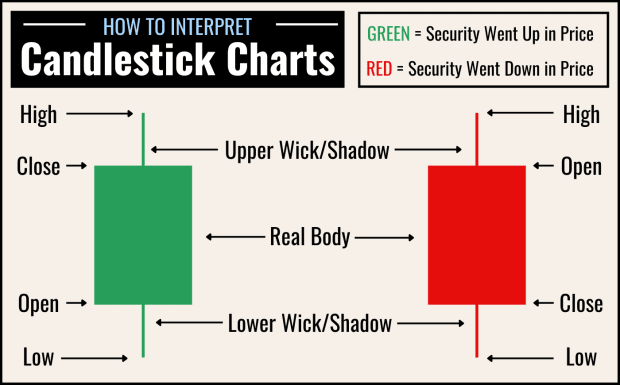

In [ ]:
df = jpm.history(period = "max")

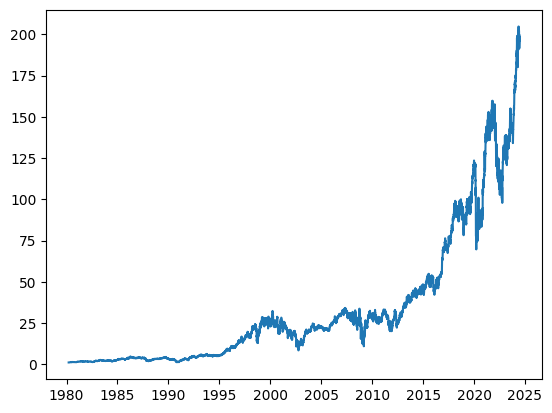

In [ ]:
plt.figure()
plt.plot(df['Close'])
plt.show()

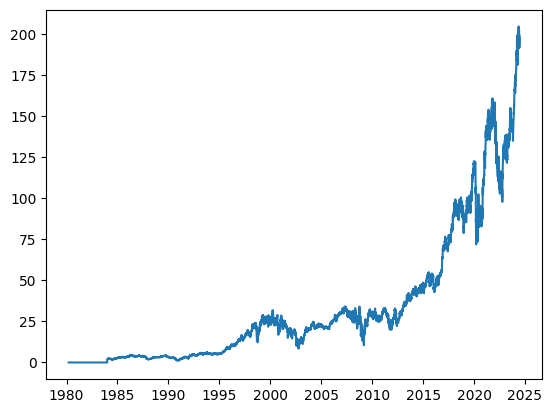

In [ ]:
plt.figure()
plt.plot(df['Open'])
plt.show()



*   Both opening and closing prices of JPM's stock show a long-term upward trend. Over the long run, the stock has appreciated significantly in value
*   There is a downward trend around 2008-2009, which is highly due to the impact of global financial crisis.
* From 2015 onwards, the stock price shows a sharp increase. This period marks a significant surge in value, with both opening and closing prices reaching their highest levels around 2023-2024



**Compare multiple stocks/ securities at the same time**

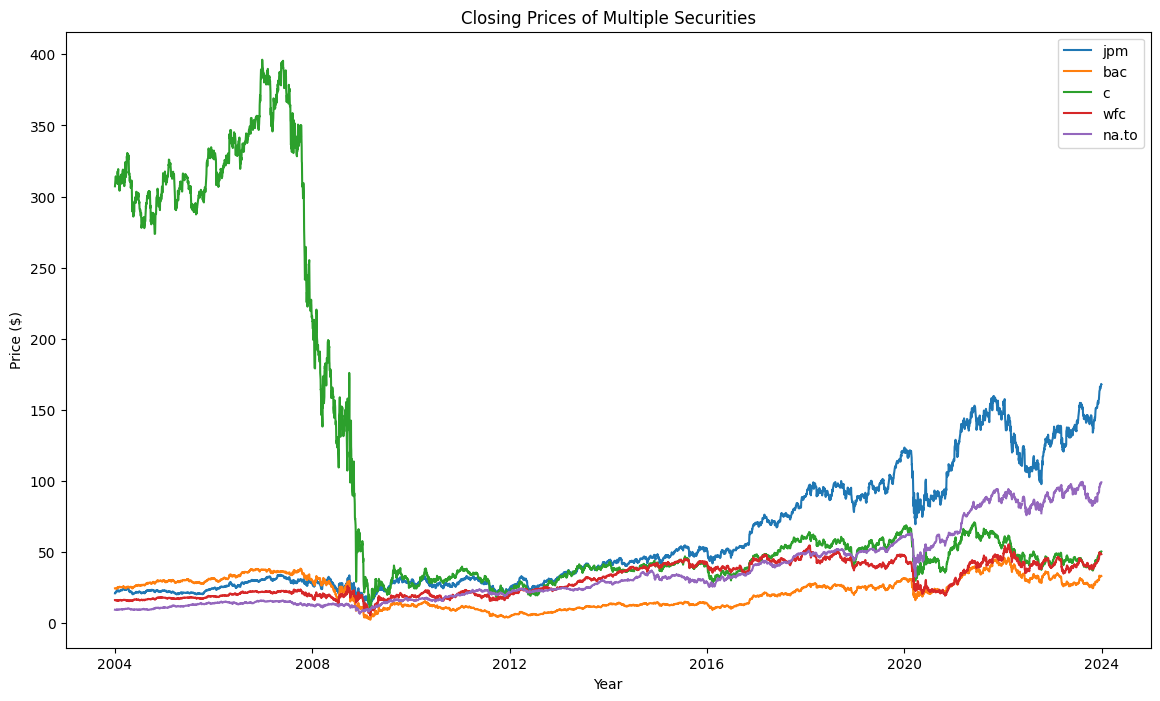

In [ ]:
securities = ['jpm', 'bac', 'c', 'wfc', 'na.to']

# Create an empty DataFrame to hold the close prices of all securities
df = pd.DataFrame()

# Retrieve the historical data for each security and add it to the DataFrame
for security in securities:
    df[security] = yf.Ticker(security).history(start='2004-01-01', end='2024-01-01')['Close']

# Plot the data
plt.figure(figsize=(14, 8))

# Loop through each column (each security) in the DataFrame and plot it
for security in df.columns:
    plt.plot(df[security], label=security)

plt.ylabel('Price ($)')
plt.xlabel('Year')
plt.title('Closing Prices of Multiple Securities')
plt.legend()
plt.show()


# 1. Data Processing

In [ ]:
jpm = yf.Ticker('jpm')
jpm_hist = jpm.history(period = "max")
print(jpm_hist.head())

                           Open      High       Low     Close  Volume  \
Date                                                                    
1980-03-17 00:00:00-05:00   0.0  1.097239  1.073472  1.077433   62775   
1980-03-18 00:00:00-05:00   0.0  1.093279  1.077434  1.085356   64125   
1980-03-19 00:00:00-05:00   0.0  1.105162  1.093279  1.101201   40500   
1980-03-20 00:00:00-05:00   0.0  1.101201  1.089317  1.093279   18900   
1980-03-21 00:00:00-05:00   0.0  1.117045  1.093278  1.117045   97200   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  
1980-03-18 00:00:00-05:00        0.0           0.0  
1980-03-19 00:00:00-05:00        0.0           0.0  
1980-03-20 00:00:00-05:00        0.0           0.0  
1980-03-21 00:00:00-05:00        0.0           0.0  


In [ ]:
jpm_hist.isnull() #Luckily, there is no NA values in JPM stock history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,False,False,False,False,False,False,False
1980-03-18 00:00:00-05:00,False,False,False,False,False,False,False
1980-03-19 00:00:00-05:00,False,False,False,False,False,False,False
1980-03-20 00:00:00-05:00,False,False,False,False,False,False,False
1980-03-21 00:00:00-05:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2024-06-14 00:00:00-04:00,False,False,False,False,False,False,False
2024-06-17 00:00:00-04:00,False,False,False,False,False,False,False
2024-06-18 00:00:00-04:00,False,False,False,False,False,False,False


# 2. Adding on new features

**Calculate Moving Average**

A moving average (MA) is a technical indicator that helps investors and traders determine the trend of a security's price over time. It's calculated by adding up all the data points over a specific period and dividing the sum by the number of time periods. This "smooths out" price fluctuations to give a general idea of where the trend is heading.

In [ ]:
jpm_hist['MA_50'] = jpm_hist['Close'].rolling(window = 50).mean() #50-day would requires 50 days of data
jpm_hist['MA_200'] = jpm_hist['Close'].rolling(window = 200).mean()


In [ ]:
# Check the data after the initial periods required for moving averages calculation
print(jpm_hist.iloc[49:55][['Close', 'MA_50', 'MA_200']])  # Checking around the 50th row
print(jpm_hist.iloc[199:205][['Close', 'MA_50', 'MA_200']])  # Checking around the 200th row

                              Close     MA_50  MA_200
Date                                                 
1980-05-27 00:00:00-04:00  1.239841  1.165292     NaN
1980-05-28 00:00:00-04:00  1.259646  1.168936     NaN
1980-05-29 00:00:00-04:00  1.243802  1.172105     NaN
1980-05-30 00:00:00-04:00  1.239841  1.174878     NaN
1980-06-02 00:00:00-04:00  1.231919  1.177651     NaN
1980-06-03 00:00:00-04:00  1.239841  1.180107     NaN
                              Close     MA_50    MA_200
Date                                                   
1980-12-30 00:00:00-05:00  1.323025  1.280166  1.264400
1980-12-31 00:00:00-05:00  1.350755  1.281037  1.265767
1981-01-02 00:00:00-05:00  1.358675  1.282146  1.267134
1981-01-05 00:00:00-05:00  1.437899  1.284840  1.268817
1981-01-06 00:00:00-05:00  1.418093  1.287217  1.270441
1981-01-07 00:00:00-05:00  1.378481  1.288960  1.271748


In [ ]:
# Drop rows with NaN values in MA_50 and MA_200
# jpm_hist.dropna(subset= ['MA_50', 'MA_200'], inplace = True)
# print(ma_drop.head())

**Daily return**
The price of the stock at today's closure compared to the price of the same stock at yesterday's closure

In [ ]:
jpm_hist['Daily_Return'] = jpm_hist['Close'].pct_change()
jpm_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_50,MA_200,Daily_Return
Date,,,,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,1.097239,1.073472,1.077433,62775,0.0,0.0,NaN,NaN,NaN
1980-03-18 00:00:00-05:00,0.000000,1.093279,1.077434,1.085356,64125,0.0,0.0,NaN,NaN,0.007353
1980-03-19 00:00:00-05:00,0.000000,1.105162,1.093279,1.101201,40500,0.0,0.0,NaN,NaN,0.014599
1980-03-20 00:00:00-05:00,0.000000,1.101201,1.089317,1.093279,18900,0.0,0.0,NaN,NaN,-0.007195
1980-03-21 00:00:00-05:00,0.000000,1.117045,1.093278,1.117045,97200,0.0,0.0,NaN,NaN,0.021739
...,...,...,...,...,...,...,...,...,...,...
2024-06-14 00:00:00-04:00,191.449997,194.860001,191.419998,193.779999,6874000,0.0,0.0,194.8412,170.318781,0.000620
2024-06-17 00:00:00-04:00,193.479996,195.580002,192.639999,194.979996,8725400,0.0,0.0,194.7918,170.567053,0.006193
2024-06-18 00:00:00-04:00,194.600006,197.960007,194.130005,197.000000,9023000,0.0,0.0,194.7622,170.834399,0.010360


**Plot daily return vs trading volume**

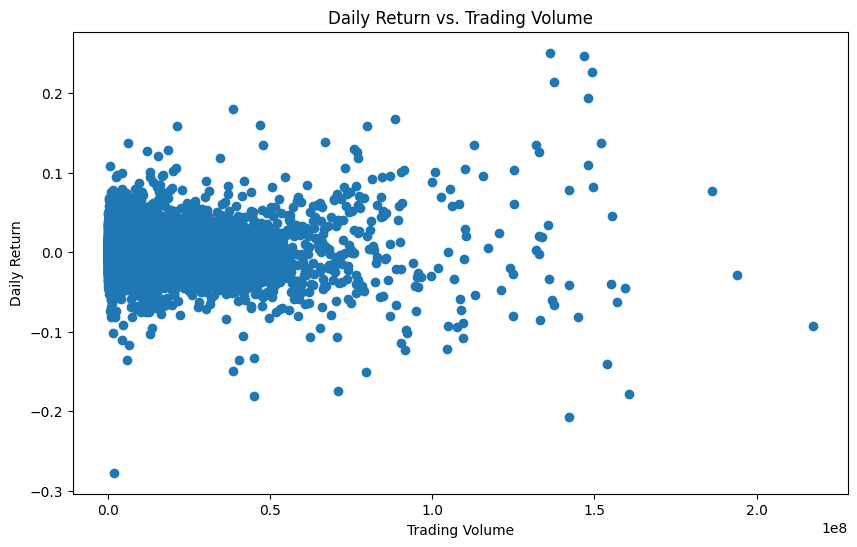

In [ ]:
# Daily Return vs. Trading Volume

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(jpm_hist['Volume'], jpm_hist['Daily_Return'])
plt.xlabel('Trading Volume')
plt.ylabel('Daily Return')
_ = plt.title('Daily Return vs. Trading Volume')

**Exponential moving average**
* An exponential moving average tends to be more responsive to recent price changes, as compared to the simple moving average, which applies equal weight to all price changes in the given period.

In [ ]:
jpm_hist['EMA_12'] = jpm_hist['Close'].ewm(span=12, adjust=False).mean()
jpm_hist['EMA_26'] = jpm_hist['Close'].ewm(span=26, adjust=False).mean()

**Relative Strength Index (RSI)**
* The Relative Strength Index, or RSI, is an oscillating indicator that is designed to measure a stock's momentum, which is both the speed and size of price changes. Many investors use this indicator to help identify whether a stock is overbought or oversold.

In [ ]:
delta = jpm_hist['Close'].diff()
gain = delta.where(delta > 0, 0).rolling(window = 14).mean()
loss = -delta.where(delta < 0, 0).rolling(window = 14).mean()
rs = gain / loss
jpm_hist['RSI'] = 100 - (100 / (1 + rs))

**Moving Average Convergence/ Divergence (MACD)**
*  A technical indicator that helps traders and investors identify potential buying and selling opportunities in stocks.
* Shows the relationship between two exponential moving averages (EMAs) of a security's price, and is designed to reveal changes in the strength, direction, momentum, and duration of a trend


In [ ]:
jpm_hist['MACD'] = jpm_hist['EMA_12'] - jpm_hist['EMA_26']
jpm_hist['Signal'] = jpm_hist['MACD'].ewm(span=9, adjust=False).mean()

**On-Balance Volume**
* On-balance volume (OBV) is a momentum indicator that uses volume flow to predict changes in stock price.

In [ ]:
jpm_hist['OBV'] = (np.sign(jpm_hist['Close'].diff()) * jpm_hist['Volume']).fillna(0).cumsum()

**Average True Range (ATR)**
* Average True Range (ATR) is the average of true ranges over the specified period.
* ATR measures volatility, taking into account any gaps in the price movement.
* Typically, the ATR calculation is based on 14 periods, which can be intraday, daily, weekly, or monthly.

In [ ]:
high_low = jpm_hist['High'] - jpm_hist['Low']
high_close = np.abs(jpm_hist['High'] - jpm_hist['Close'].shift())
low_close = np.abs(jpm_hist['Low'] - jpm_hist['Close'].shift())
true_range = high_low.to_frame(name='high_low').join(high_close.to_frame(name='high_close')).join(low_close.to_frame(name='low_close')).max(axis=1)
jpm_hist['ATR'] = true_range.rolling(window=14).mean()

**Cumulative Returns**

In [ ]:
# Cumulative Returns
jpm_hist['Cumulative_Returns'] = (1 + jpm_hist['Daily_Return']).cumprod()

**Bollinger Bands**
* Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price

In [ ]:
jpm_hist['20_day_MA'] = jpm_hist['Close'].rolling(window=20).mean()
jpm_hist['20_day_SD'] = jpm_hist['Close'].rolling(window=20).std()
jpm_hist['Upper_Band'] = jpm_hist['20_day_MA'] + (jpm_hist['20_day_SD'] * 2)
jpm_hist['Lower_Band'] = jpm_hist['20_day_MA'] - (jpm_hist['20_day_SD'] * 2)

In [ ]:
# Drop NaN
jpm_hist.dropna(inplace = True)

In [ ]:
jpm_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_50,MA_200,Daily_Return,...,RSI,MACD,Signal,OBV,ATR,Cumulative_Returns,20_day_MA,20_day_SD,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-30 00:00:00-05:00,0.0,1.323025,1.303219,1.323025,319275,0.0,0.0,1.280166,1.264400,0.000000,...,79.069811,0.016870,0.008391,1676025.0,0.022069,1.227941,1.272521,0.045833,1.364187,1.180854
1980-12-31 00:00:00-05:00,0.0,1.350755,1.315104,1.350755,146475,0.0,0.0,1.281037,1.265767,0.020959,...,81.632991,0.019376,0.010588,1822500.0,0.023201,1.253678,1.278066,0.048314,1.374694,1.181439
1981-01-02 00:00:00-05:00,0.0,1.366597,1.342830,1.358675,263250,0.0,0.0,1.282146,1.267134,0.005864,...,82.000087,0.021751,0.012820,2085750.0,0.023484,1.261029,1.284404,0.050218,1.384840,1.183968
1981-01-05 00:00:00-05:00,0.0,1.445821,1.370559,1.437899,192375,0.0,0.0,1.284840,1.268817,0.058310,...,89.705917,0.029684,0.016193,2278125.0,0.028860,1.334559,1.294109,0.059799,1.413708,1.174510
1981-01-06 00:00:00-05:00,0.0,1.437899,1.406210,1.418093,110025,0.0,0.0,1.287217,1.270441,-0.013774,...,83.098750,0.033981,0.019751,2168100.0,0.029992,1.316177,1.303418,0.063955,1.431328,1.175507


# 3. More Data Visualization

**Closing price vs moving averages**

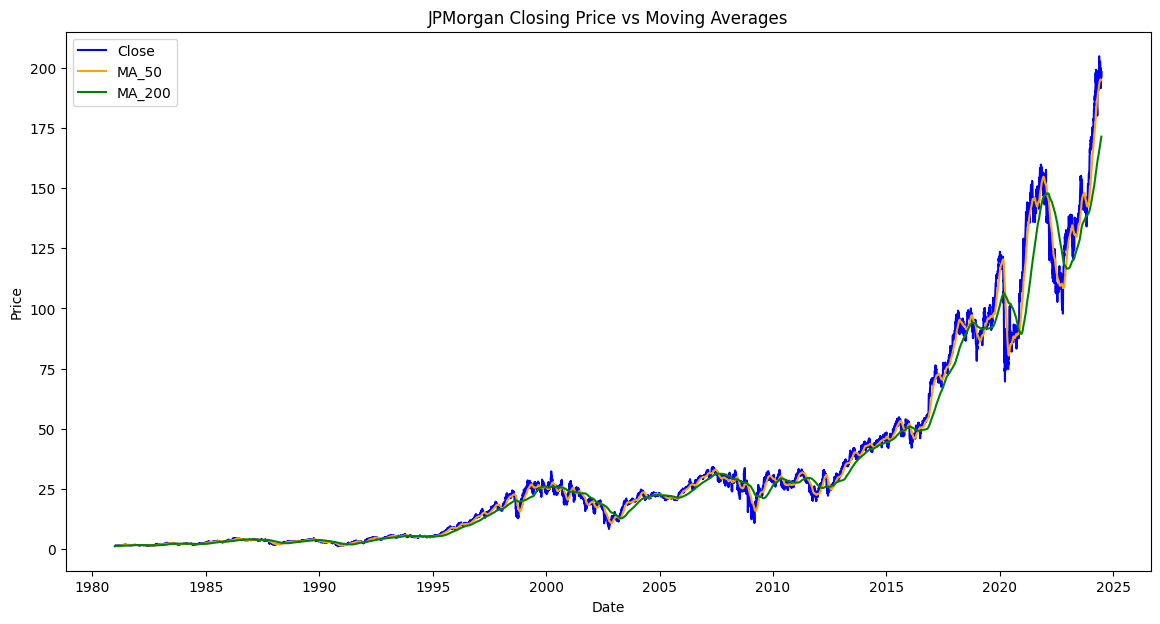

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist['Close'], label='Close', color = 'blue')
plt.plot(jpm_hist['MA_50'], label='MA_50', color = 'orange')
plt.plot(jpm_hist['MA_200'], label='MA_200', color = 'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('JPMorgan Closing Price vs Moving Averages')
plt.legend()
plt.show()

* There is an upward trend in JPM closing price from 1980 to 2025
* Both the 50-day and 200-day MA follow the trend of the closing price but are smoother.
* There are periods of higher volatility, such as around the 2008 financial crisis and the COVID pandemic period, where they have high fluctuations

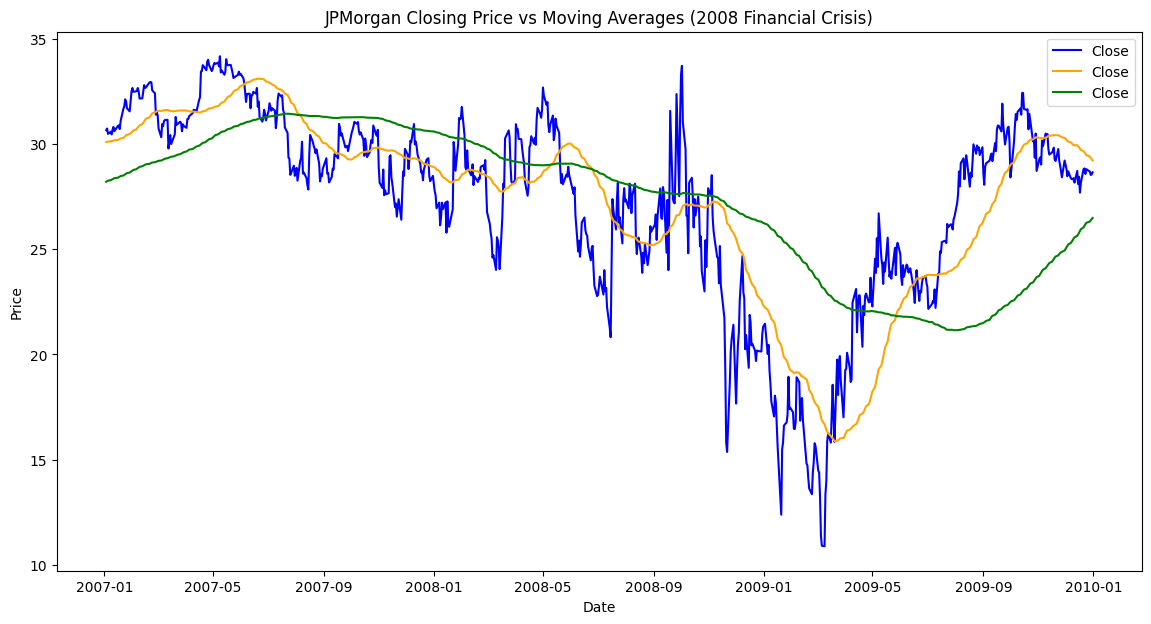

In [ ]:
# Zoom in the 2008 financial crisis
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist.loc['2007-01-01':'2009-12-31']['Close'], label='Close', color = 'blue')
plt.plot(jpm_hist.loc['2007-01-01':'2009-12-31']['MA_50'], label='Close', color = 'orange')
plt.plot(jpm_hist.loc['2007-01-01':'2009-12-31']['MA_200'], label='Close', color = 'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('JPMorgan Closing Price vs Moving Averages (2008 Financial Crisis)')
plt.legend()
plt.show()

* There is a significant drop from 35 in mid-2007 to below 15 in early 2009
* For 50 day moving average, quick response to price changes, which crossed below the 200 day MA in late 2007
* For 20 day moving average, there is a gradual declie, showing a longer-term bearish trend
* Volatility: high violatility with sharp spikes and drops
* Price started to recover and stablize in early 2009, which 50-MA and 200-MA turned upward. 50MA and 200MA converegd towards the end of 2009, indicating stablization

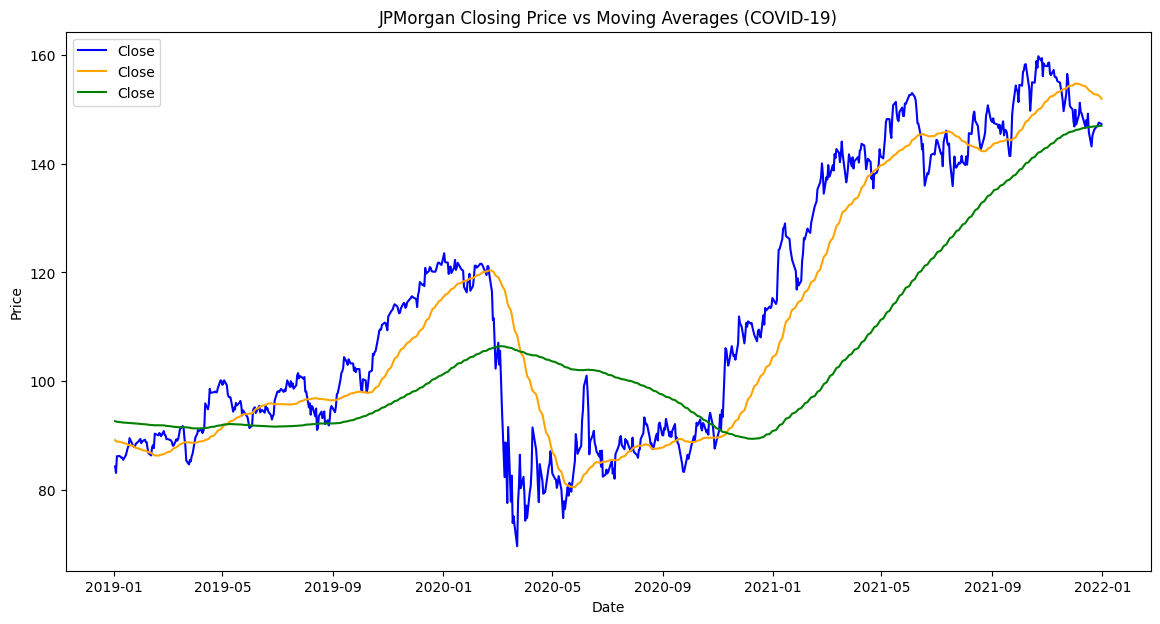

In [ ]:
# Zoom in the COVID-19 period
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist.loc['2019-01-01':'2021-12-31']['Close'], label='Close', color = 'blue')
plt.plot(jpm_hist.loc['2019-01-01':'2021-12-31']['MA_50'], label='Close', color = 'orange')
plt.plot(jpm_hist.loc['2019-01-01':'2021-12-31']['MA_200'], label='Close', color = 'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('JPMorgan Closing Price vs Moving Averages (COVID-19)')
plt.legend()
plt.show()

* There is a sharp decline in 2019, falling from 140 to below 80, reflecting the market search crash due to COVID-19
* 50-day MA have a rapidly responded to the price drop, and crossed below the 200-day MA.
* However, the price stabilized and continuted to rise through 2021, reaching around 160
* Moving averages converged and continued upward, indicating recovery and stabilization

**Closing Price with Bollinger Bands**

<function matplotlib.pyplot.show(close=None, block=None)>

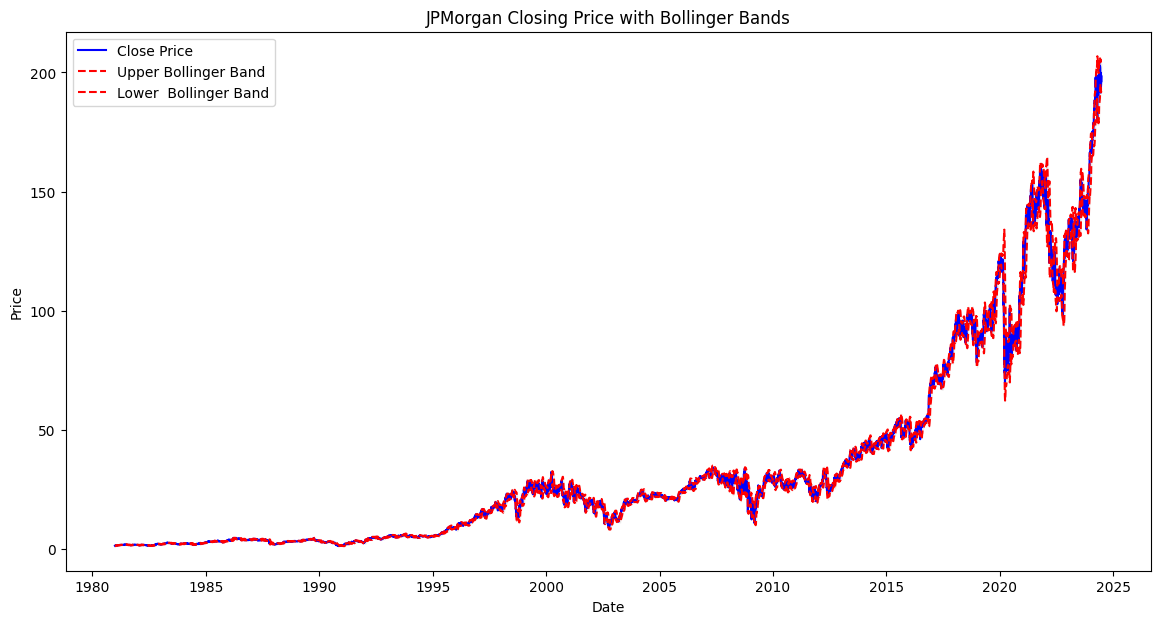

In [ ]:
# Plot closing price with Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist['Close'], label='Close Price', color = 'blue')
plt.plot(jpm_hist['Upper_Band'], label='Upper Bollinger Band', color = 'red', linestyle= '--')
plt.plot(jpm_hist['Lower_Band'], label='Lower  Bollinger Band', color = 'red', linestyle= '--')
plt.fill_between(jpm_hist.index, jpm_hist['Upper_Band'], jpm_hist['Lower_Band'], color='gray', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('JPMorgan Closing Price with Bollinger Bands')
plt.legend()
plt.show

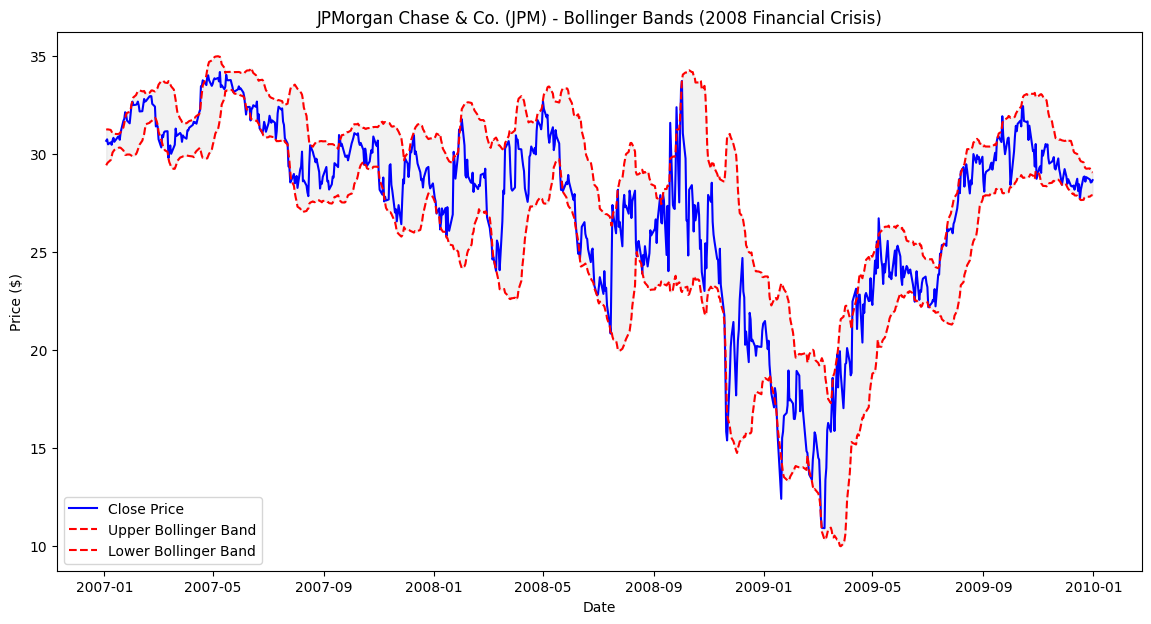

In [ ]:
# Zoom in on the 2008 financial crisis
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist.loc['2007-01-01':'2009-12-31', 'Close'], label='Close Price', color='blue')
plt.plot(jpm_hist.loc['2007-01-01':'2009-12-31', 'Upper_Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(jpm_hist.loc['2007-01-01':'2009-12-31', 'Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')
plt.fill_between(jpm_hist.loc['2007-01-01':'2009-12-31'].index,
                 jpm_hist.loc['2007-01-01':'2009-12-31', 'Upper_Band'],
                 jpm_hist.loc['2007-01-01':'2009-12-31', 'Lower_Band'],
                 color='grey', alpha=0.1)
plt.title('JPMorgan Chase & Co. (JPM) - Bollinger Bands (2008 Financial Crisis)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

* The stock price frequently touches or exceeds the lower Bollinger Band during the decline, indicating oversold conditions
* The price occasionally touches the upper Bollinger band during brief recoveries, indicating  overbought conditions

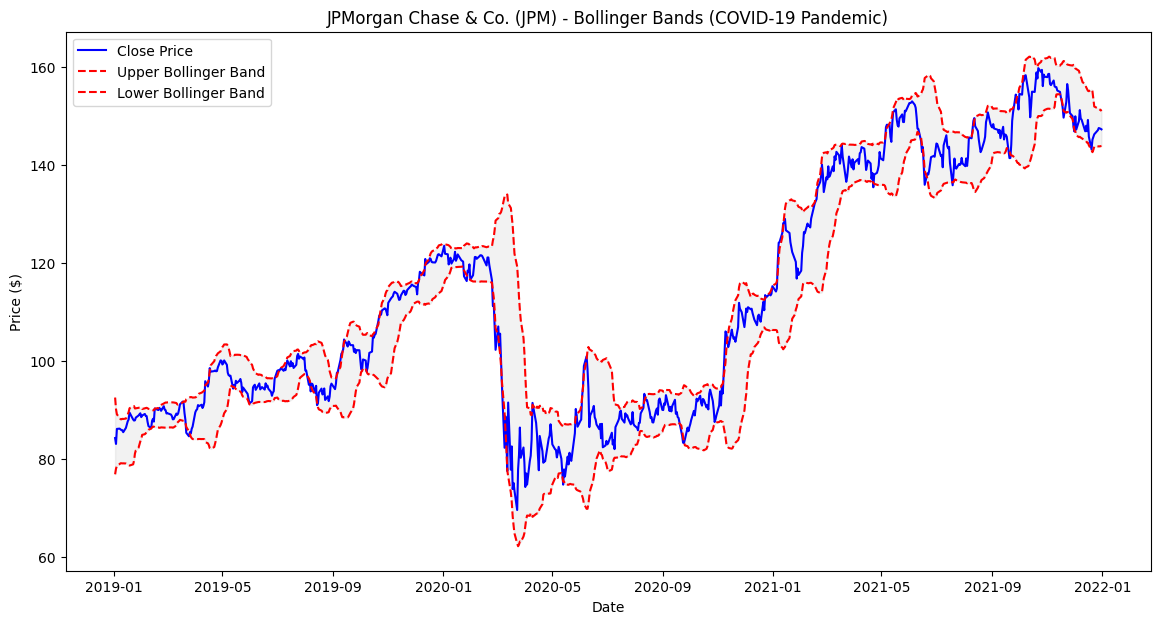

In [ ]:
# Zoom in on the COVID-19 pandemic period
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist.loc['2019-01-01':'2021-12-31', 'Close'], label='Close Price', color='blue')
plt.plot(jpm_hist.loc['2019-01-01':'2021-12-31', 'Upper_Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(jpm_hist.loc['2019-01-01':'2021-12-31', 'Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')
plt.fill_between(jpm_hist.loc['2019-01-01':'2021-12-31'].index,
                 jpm_hist.loc['2019-01-01':'2021-12-31', 'Upper_Band'],
                 jpm_hist.loc['2019-01-01':'2021-12-31', 'Lower_Band'],
                 color='grey', alpha=0.1)
plt.title('JPMorgan Chase & Co. (JPM) - Bollinger Bands (COVID-19 Pandemic)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

* Bands widen significantly during sharp decline in early 2020, reflecting increased volatility and market uncertainty


**MACD**

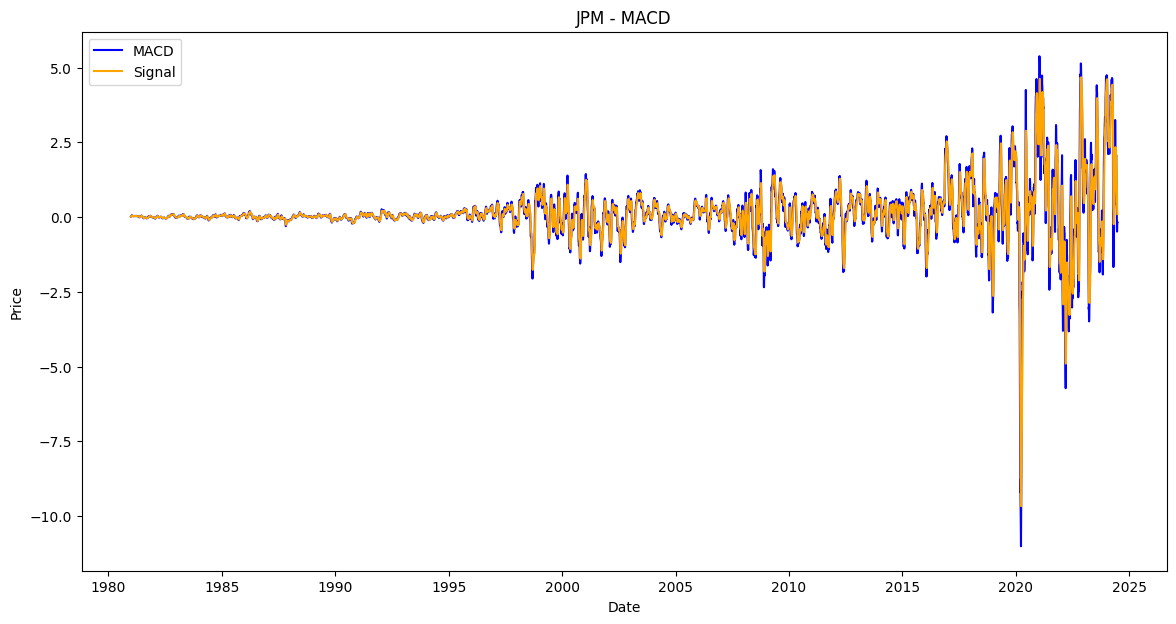

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist['MACD'], label='MACD', color = 'blue')
plt.plot(jpm_hist['Signal'], label='Signal', color = 'orange')
plt.title('JPM - MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**RSI**

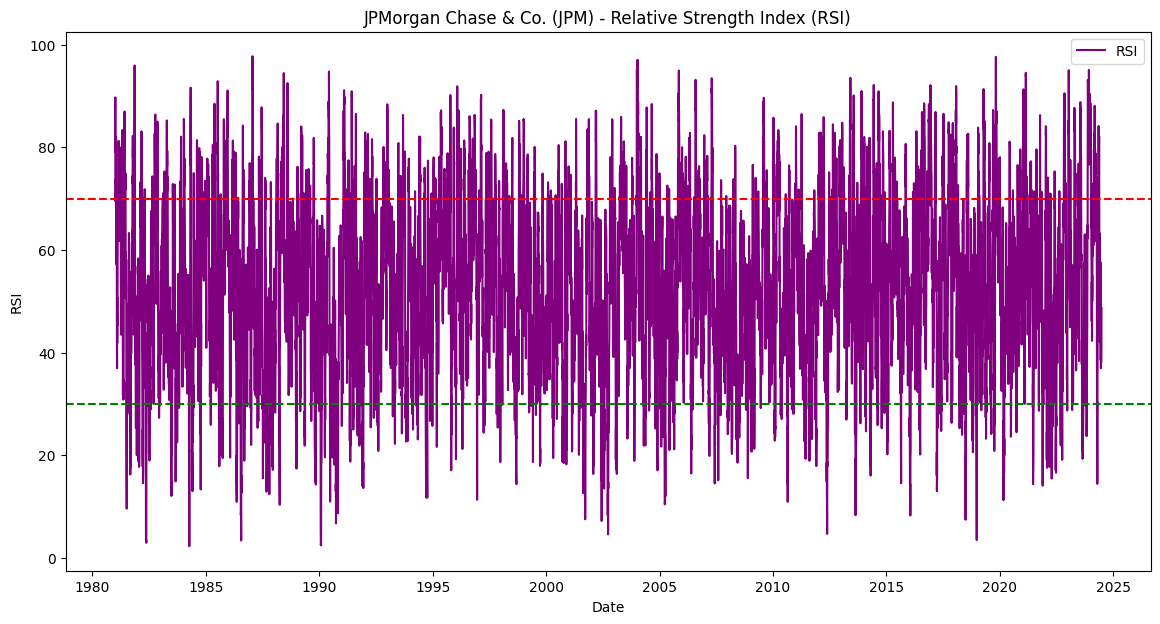

In [ ]:
# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('JPMorgan Chase & Co. (JPM) - Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


* The RSI fluctuates between 0 and 100, with common thresholds at 70 (overbought) and 30 (oversold).
* There is no clear long-term trend in the RSI

**Daily Returns**

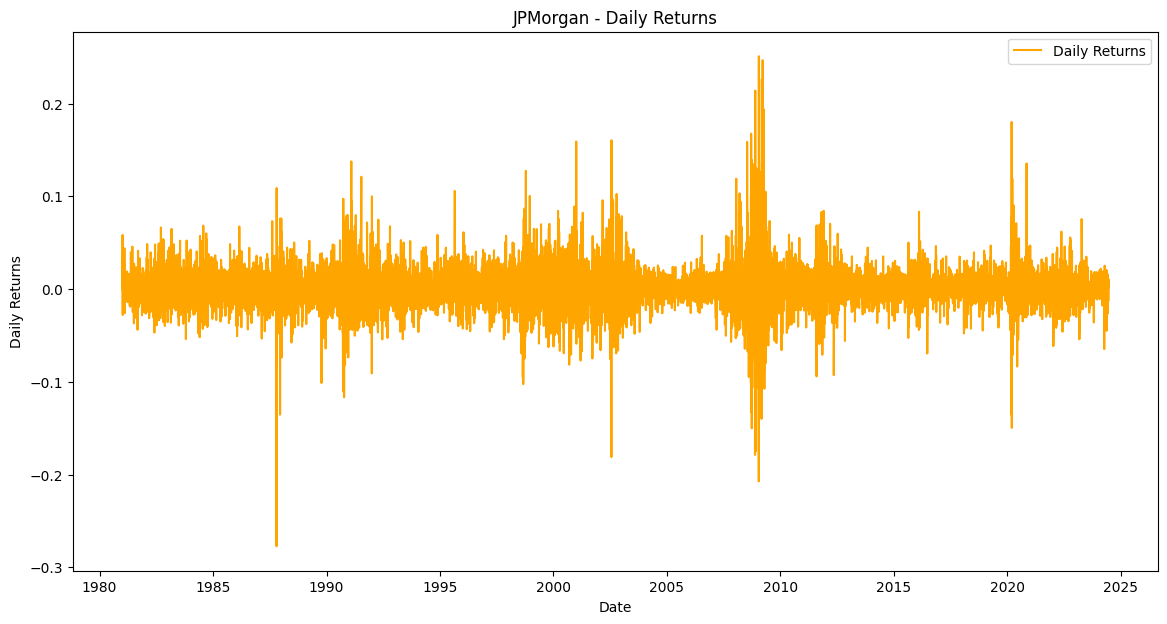

In [ ]:
# Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist['Daily_Return'], label='Daily Returns', color='orange')
plt.title('JPMorgan - Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

* Late 1980s to Early 1990s: Increased volatility with some extreme negative returns.
* 2000: High volatility around the dot-com bubble, with significant positive and negative returns.
* 2008-2009: The financial crisis period shows extreme volatility, with large swings in daily returns.
* 2020: Volatility spike due to the COVID-19 pandemic, with significant fluctuations in returns.

# Exploration Questions

## 1. What's the change in price of stock over time?

In [ ]:
initial = jpm_hist['Close'].iloc[0]
final = jpm_hist['Close'].iloc[-1]
price_change = final - initial
percentage_change = (price_change / initial) * 100

print(f"Initial price: ${initial:.2f}")
print(f"Final price: ${final:.2f}")
print(f"Price change: ${price_change:.2f}")
print(f"Percentage change: {percentage_change:.2f}%")

Initial price: $1.32
Final price: $196.30
Price change: $194.98
Percentage change: 14737.21%


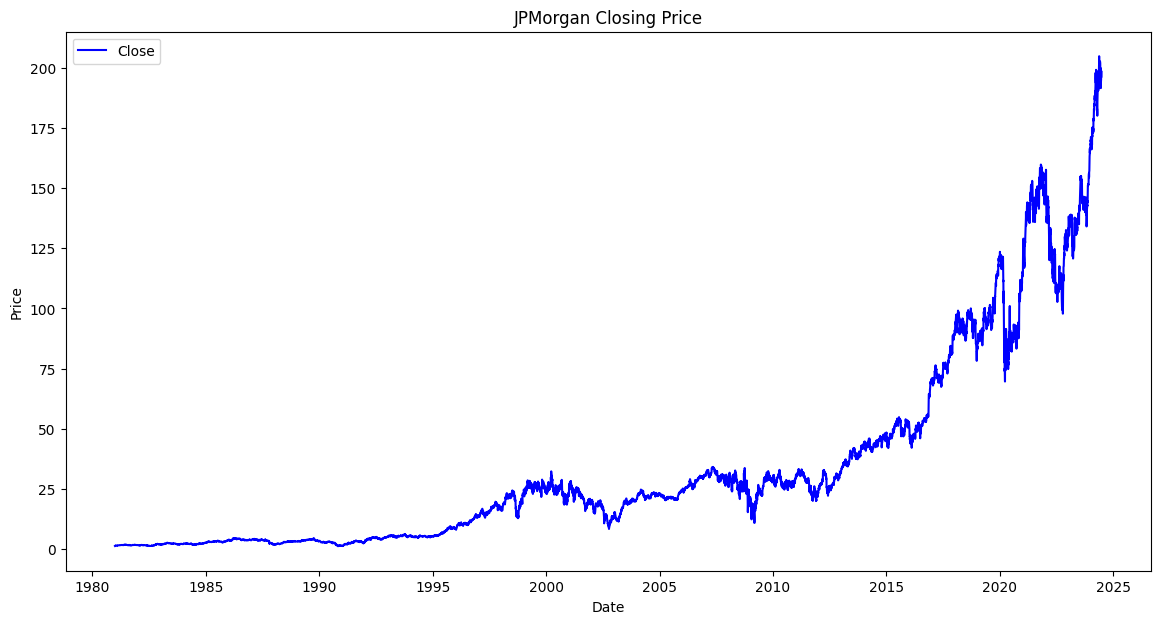

In [ ]:
#Plot closing price over time
plt.figure(figsize=(14, 7))
plt.plot(jpm_hist['Close'], label='Close', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('JPMorgan Closing Price')
plt.legend()
plt.show()

## 2. What was the daily return of the stock on average?

In [ ]:
jpm_hist['Daily_Return'] = jpm_hist['Close'].pct_change()
average_daily_return = jpm_hist['Daily_Return'].mean() * 100
print(f"Average daily return: {average_daily_return:.2f}%")

Average daily return: 0.07%


* An average daily return of 0.07% is good, especially when annualized as it can result in significant yearly gains
* Small daily returns compound over time -> substantial long term growth

## 3. What was the moving average of various stocks?

In [ ]:
tickers = {
    'JPMorgan Chase': 'JPM',
    'Bank of America': 'BAC',
    'Citi': 'C',
    'Morgan Stanley': 'MS',
    'Goldman Sachs': 'GS',
    'HSBC': 'HSBC',
    'Wells Fargo': 'WFC',
    'Barclays': 'BCS'
}
data = pd.DataFrame()

In [ ]:
for company, ticker in tickers.items():
    stock = yf.Ticker(ticker)
    hist = stock.history(period = "max")[['Close']]
    hist.columns = [company]
    if data.empty:
      data = hist
    else:
      data = data.join(hist, how = 'outer')

In [ ]:
for company in tickers.keys():
  data[f'{company}_MA_50'] = data[company].rolling(window = 50).mean()
  data[f'{company}_MA_200'] = data[company].rolling(window = 200).mean()

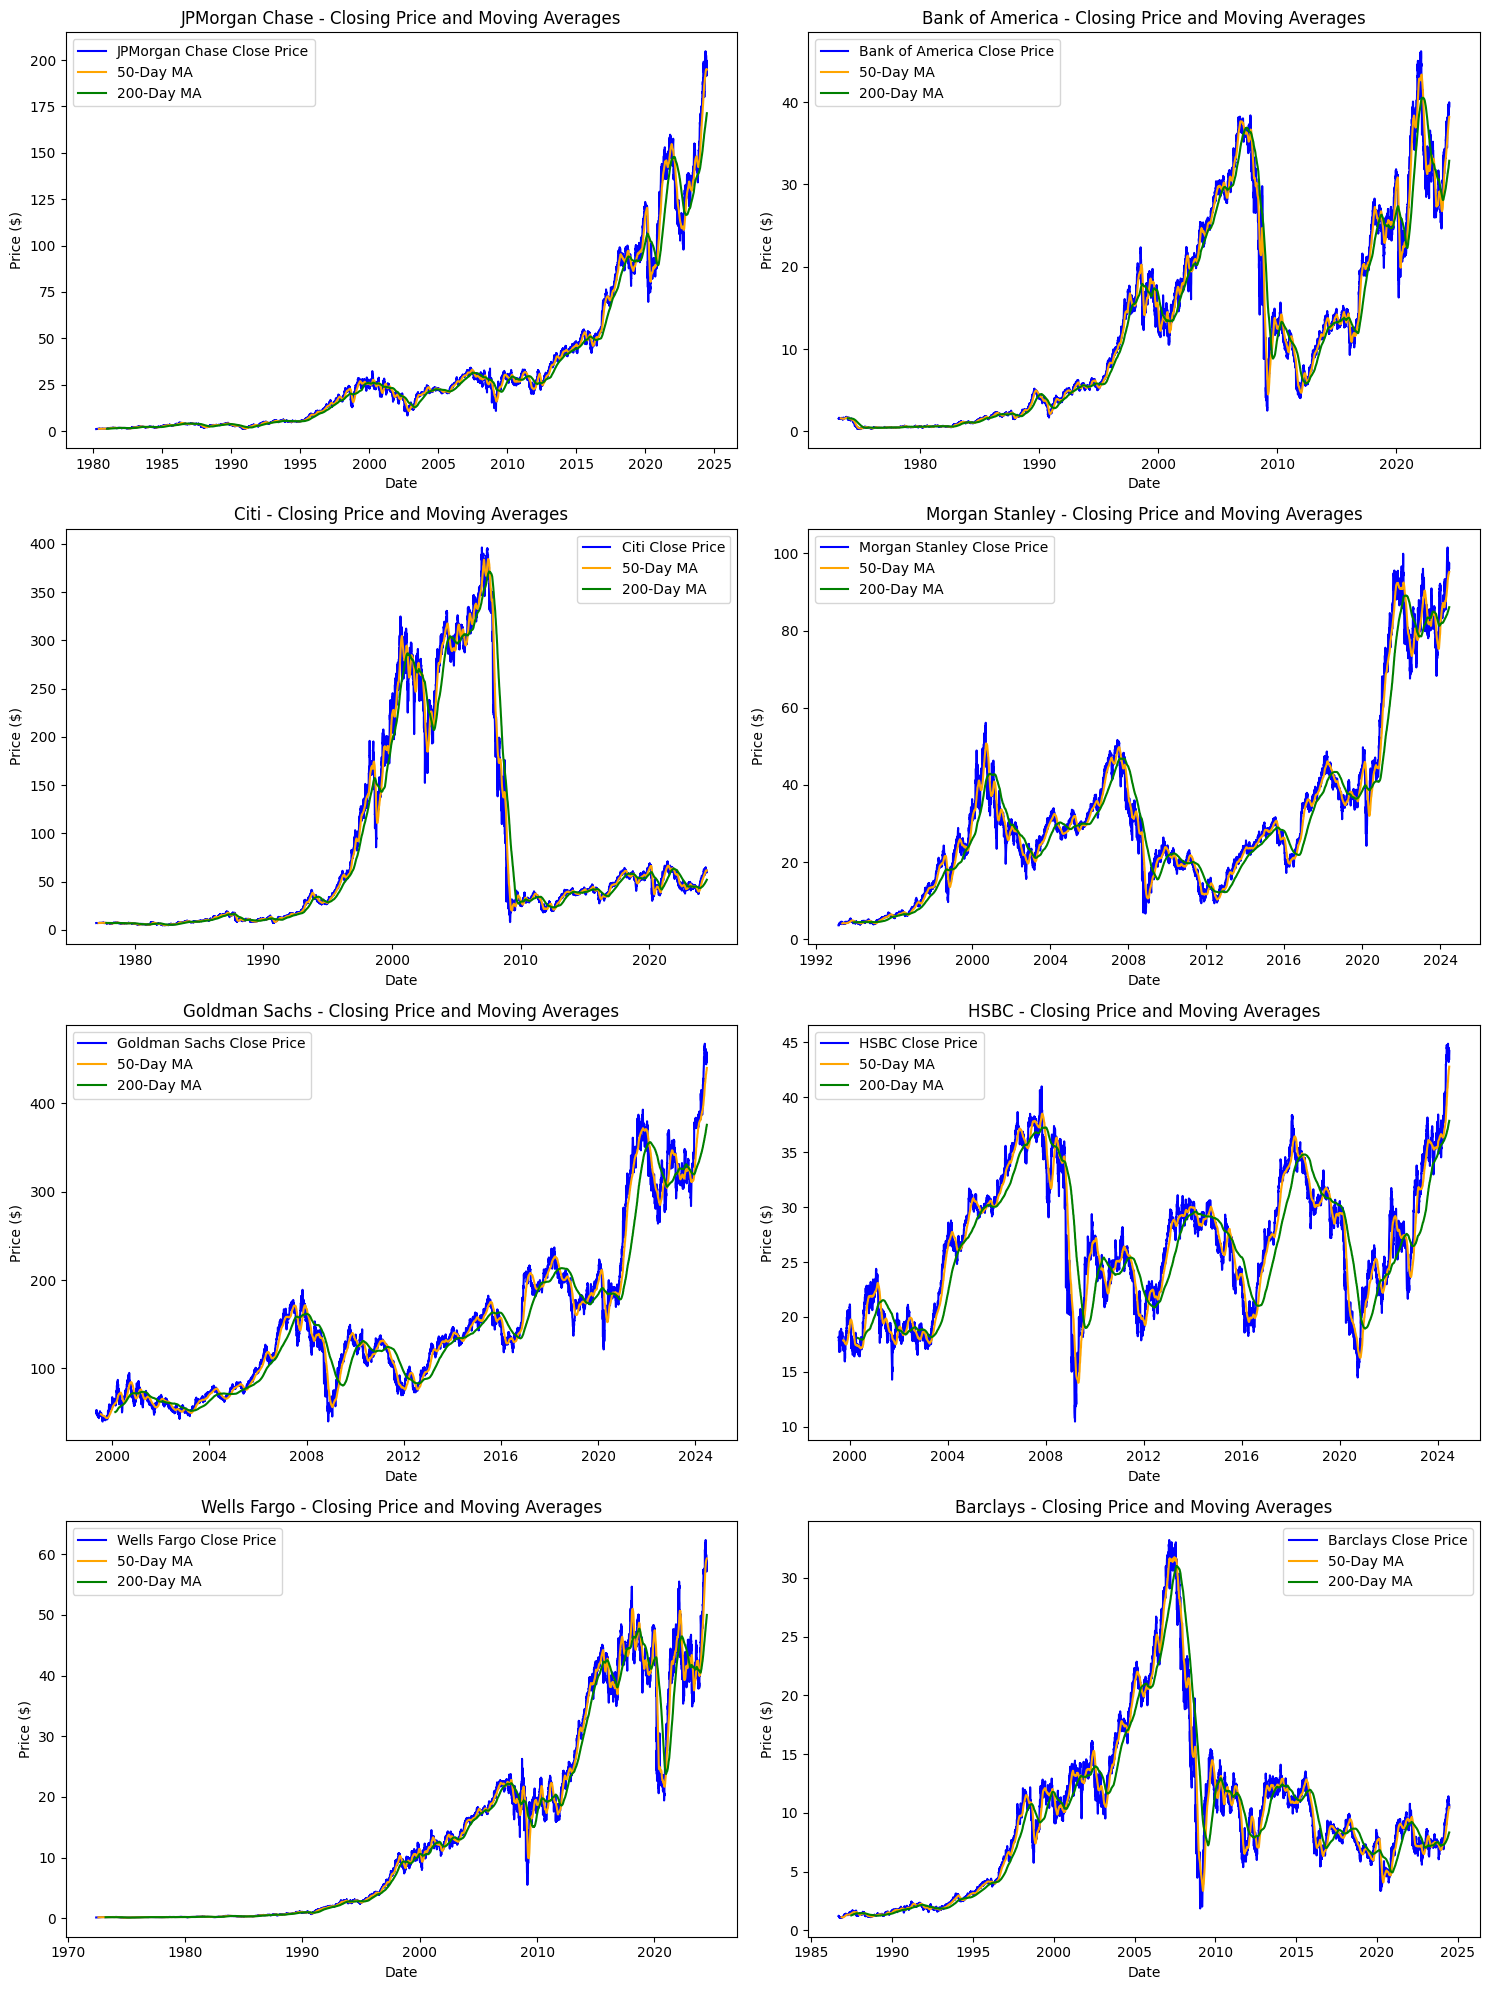

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 20))
axes = axes.flatten()


for i, company in enumerate(tickers.keys()):
  axes[i].plot(data[company], label=f'{company} Close Price', color='blue')
  axes[i].plot(data[f'{company}_MA_50'], label='50-Day MA', color='orange')
  axes[i].plot(data[f'{company}_MA_200'], label='200-Day MA', color='green')
  axes[i].set_title(f'{company} - Closing Price and Moving Averages')
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel('Price ($)')
  axes[i].legend()
plt.tight_layout()
plt.show()

**Trend**
* *JPM* has a strong upward trend with significant growth over the entire period
* *Bank of America* has a similar uptrend, however, it seems to have more fluctuations during the financial crisis and COVID compared to JPM
* *Citi* has a significant growth pre-2008, followed by a sharp decline during the financial crisis.
* *Morgan Stanley* has a strong growth, especially post 2010. It has a negative impact during the financial crisis, but they recovered well
* *Goldman Sachs* seems to have a strong growth, especially post 2010. Just like Morgan Stanley, it also has negative impacts during financial crisis, but recovered well
* *HSBC* has steady growth with noticeable impact during financial crisis. It has slower recovery post crisis compared to other banks
* *Wells Fargo* has strong grwoth pre 2008, but have significant decline during financial crisis, and slow recovery
* *Barclays* has significant growth pre 2008, followed by a sharp decline and slow recovery, which is somewhat similar to HSBC





**Moving Averages**

* *JPM* has 50-day and 200-day MAs closely follow the price, indicating sustained growth.
* *BAC* show more volatility compared to JPM, especially during the crisis
* *Citi* has moving averages reflect the sharp decline and slow recovery, with recent years showing more stability
* *Morgan Stanley* seems to have strong recovery and growth phases
* *Goldman Sachs* have very quick recovery post-crisis
* *HSBC* moving average shows more prolonged downturns and slower recovery
* *Wells Fargo* has sharp decline and longer recovery
* *Barclays* has significant impact during financial crisis with slower recovery



**Overall Performance**


* JPM, Morgan Stanley, and Goldman Sachs have strong and consistent growth, especially starting from post 2010
* Bank of America showed strong growth but with more volatility compared to JPM
* Citi, HSBC, Wells Fargo, and Barclays experienced significant negative impacts during financial crisis, and with slower recoveries

## 5. What was the correlation between different stocks?

In [ ]:
tickers = {
    'JPMorgan Chase': 'JPM',
    'Bank of America': 'BAC',
    'Citi': 'C',
    'Morgan Stanley': 'MS',
    'Goldman Sachs': 'GS',
    'HSBC': 'HSBC',
    'Wells Fargo': 'WFC',
    'Barclays': 'BCS'
}
data = pd.DataFrame()

for company, ticker in tickers.items():
    stock = yf.Ticker(ticker)
    hist = stock.history(period = "max")[['Close']]
    hist.columns = [company]
    if data.empty:
      data = hist
    else:
      data = data.join(hist, how = 'outer')

In [ ]:
corr_matrix = data.corr()
corr_matrix

,JPMorgan Chase,Bank of America,Citi,Morgan Stanley,Goldman Sachs,HSBC,Wells Fargo,Barclays
JPMorgan Chase,1.000000,0.723033,-0.020458,0.877055,0.948407,0.350679,0.870321,0.063263
Bank of America,0.723033,1.000000,0.626230,0.800034,0.576372,0.560884,0.757252,0.664755
Citi,-0.020458,0.626230,1.000000,0.073236,-0.445112,0.092033,0.131488,0.819662
Morgan Stanley,0.877055,0.800034,0.073236,1.000000,0.880020,0.372859,0.684029,0.154856
Goldman Sachs,0.948407,0.576372,-0.445112,0.880020,1.000000,0.459904,0.810146,-0.294127
HSBC,0.350679,0.560884,0.092033,0.372859,0.459904,1.000000,0.477683,0.423309
Wells Fargo,0.870321,0.757252,0.131488,0.684029,0.810146,0.477683,1.000000,0.278565
Barclays,0.063263,0.664755,0.819662,0.154856,-0.294127,0.423309,0.278565,1.000000


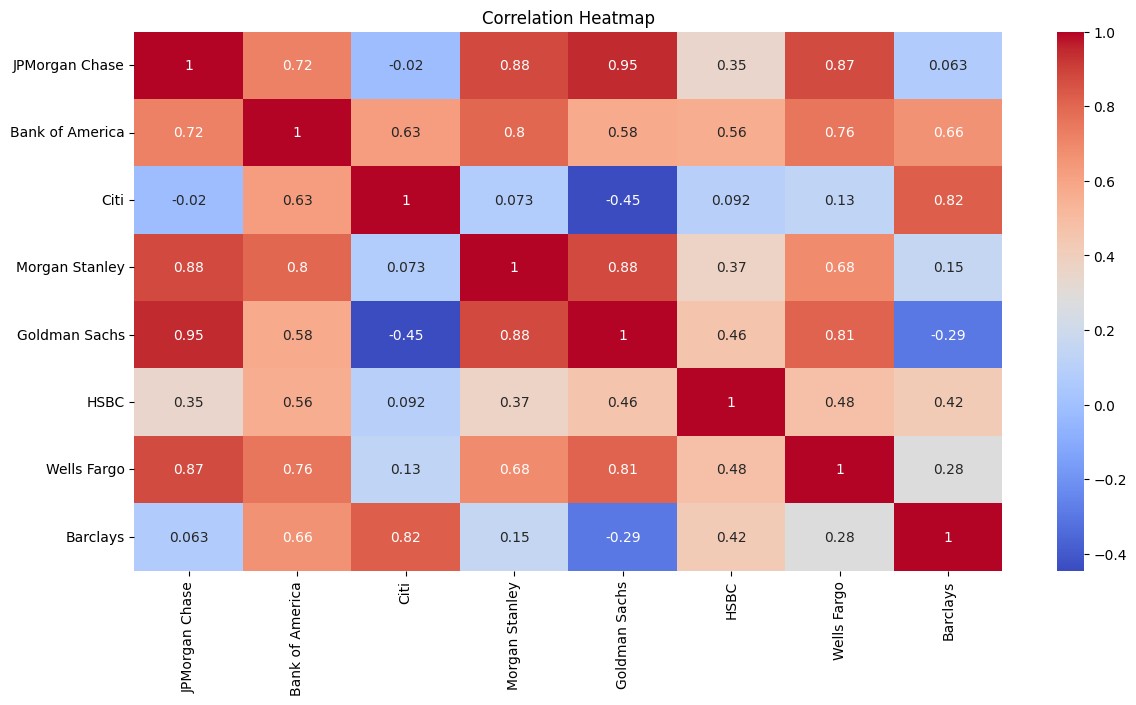

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Analysis**

* Strong Correlation: JPM, Morgan Stanley, and Goldman Sachs have strong correlations with each other, indicating they often respond similarly to market conditions
* Moderate correlation: BoA shows some correlayions with other banks, indicating shared market influences but also some differences
* Weak and Negative correlations: Citi shows come weak/ negative correlations with Goldman Sachs; it might have different market conditions compared to other banks

## 6. How can we attempt to predict future stock behavior? -- predicting closing price stock price using LSTM

In [ ]:
# Set the stock symbol and start date
stock_symbol = 'JPM'
start_date = '2014-01-01'
end_date = '2024-01-01'

# Download the stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Data preprocessing
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
close_price_scaled = scaler.fit_transform(close_prices)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Split data into training and validation sets
split_ratio = 0.8
split_time = int(len(close_price_scaled) * split_ratio)
time_train = close_price_scaled[:split_time]
time_valid = close_price_scaled[split_time:]


In [ ]:
# Set parameters
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
# Create input data for LSTM
def create_lstm_data(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = window_size
x_train, y_train = create_lstm_data(time_train, time_steps)
x_valid, y_valid = create_lstm_data(time_valid, time_steps)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_valid, y_valid), shuffle=True)

Epoch 1/50
61/61 [==============================] - 17s 190ms/step - loss: 0.0164 - val_loss: 0.0017
Epoch 2/50
61/61 [==============================] - 6s 102ms/step - loss: 9.9304e-04 - val_loss: 0.0017
Epoch 3/50
61/61 [==============================] - 5s 80ms/step - loss: 9.4368e-04 - val_loss: 0.0017
Epoch 4/50
61/61 [==============================] - 4s 59ms/step - loss: 9.3424e-04 - val_loss: 0.0015
Epoch 5/50
61/61 [==============================] - 3s 48ms/step - loss: 8.7179e-04 - val_loss: 0.0015
Epoch 6/50
61/61 [==============================] - 4s 72ms/step - loss: 8.3210e-04 - val_loss: 0.0014
Epoch 7/50
61/61 [==============================] - 3s 49ms/step - loss: 8.4467e-04 - val_loss: 0.0018
Epoch 8/50
61/61 [==============================] - 3s 50ms/step - loss: 7.5909e-04 - val_loss: 0.0012
Epoch 9/50
61/61 [==============================] - 3s 48ms/step - loss: 7.3144e-04 - val_loss: 0.0012
Epoch 10/50
61/61 [==============================] - 4s 72ms/step - loss: 

In [ ]:
# Predict closing prices
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_valid)

14/14 [==============================] - 1s 17ms/step


In [ ]:
# Denormalize the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_unscaled = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_valid_unscaled = scaler.inverse_transform(y_valid.reshape(-1, 1))

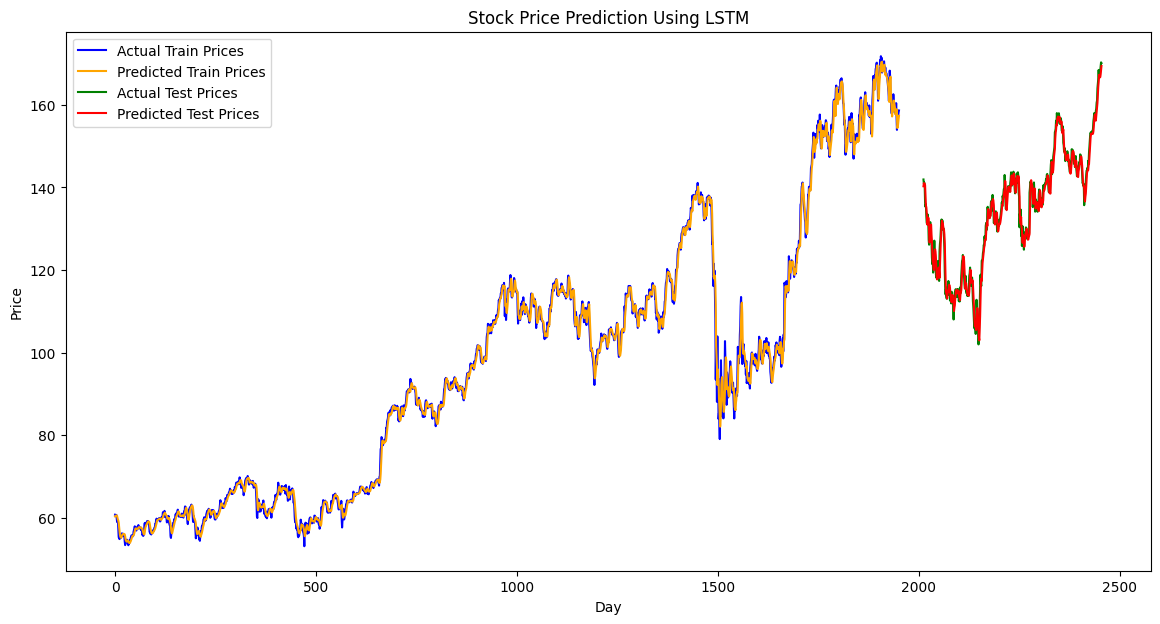

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual and predicted train prices
plt.plot(y_train_unscaled, label='Actual Train Prices', color='blue')
plt.plot(train_predictions, label='Predicted Train Prices', color='orange')

# Offset for the test data plotting
test_offset = len(y_train_unscaled) + window_size

# Plot actual and predicted test prices
plt.plot(np.arange(test_offset, test_offset + len(y_valid_unscaled)), y_valid_unscaled, label='Actual Test Prices', color='green')
plt.plot(np.arange(test_offset, test_offset + len(test_predictions)), test_predictions, label='Predicted Test Prices', color='red')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price Prediction Using LSTM')
plt.legend()
plt.show()

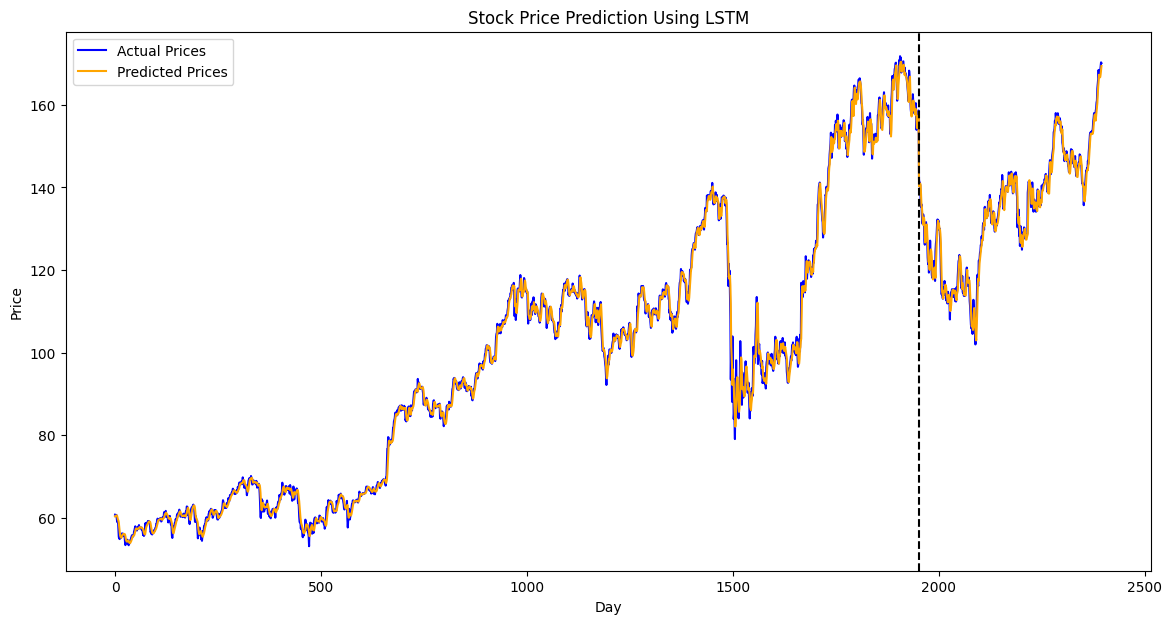

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual and predicted prices with continuous x-axis
plt.plot(combined_actual, label='Actual Prices', color='blue')
plt.plot(combined_predictions, label='Predicted Prices', color='orange')

# Markers to separate training and testing segments
plt.axvline(x=len(y_train_unscaled), color='black', linestyle='--')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price Prediction Using LSTM')
plt.legend()
plt.show()